# PCO. Modélisation IA
## Compétences C5. C6. C7.

![IllustrationModel](Ressources_NB\IllustrationModel.png)

Ce fichier contient la modélisation IA retenue à partir des données traitées en amont durant l'analyse. Le modèle sera utilisé lors de la démonstration sur application.

## Compétences
* **C5.** Concevoir le programme d’intelligence artificielle adapté aux données disponibles afin de répondre aux objectifs fonctionnels du projet, à l’aide des algorithmes, outils et méthodes standards, notamment de machine learning et de deep learning.
* **C6.** Développer le programme d’intelligence artificielle selon les données du projet et les éléments de conception définis, en exploitant les algorithmes et les outils standards couramment utilisés dans le domaine.
* **C7.** Développer l’interaction entre les fonctionnalités de l’application et l’intelligence artificielle dans le respect des objectifs visés et des bonnes pratiques du domaine.


Afin de répondre à la problématique, détection des utilisateurs susceptibles de se désabonner, plusieurs modèles de Machine Learning seront conçus et évalués afin de retenir celui possèdant les meilleures performances. 

## Métriques utilisées :
Se basant sur de la classification binaire, les métriques d'évaluation de modèle sont :

* **Log Loss (Logistic Loss,  Cross-entropy Loss)** : La mesure de classification la plus importante basée sur les probabilités. Les prédictions du modèle évaluée sont davantage robustes si le score est proche de 0. *Log Loss* est une variante de la fonction de vraisemblance.![EquationLoss](Ressources_NB\EquationLoss.png) Le score représente le produit des probabilités prédictives. La fonction de perte Logistique est définie sous l'équation ci-dessus où *y* est la target 0 ou 1, *p* l'estimation du modèle.


* **AUC (Aire Sous la Courbe ROC, Fonction d’Efficacité du Récepteur)** : Cette métrique mesure toute la zone bidimensionnelle sous toute la courbe ROC (intégral) de (0,0) à (1,1). L'AUC est comprise entre 0 et 1. Un modèle dont les prédictions sont fausses à 100 % a une AUC de 0 ; celui dont les prédictions sont correctes à 100 % a une AUC de 1. Cette métrique est pertinente pour les cas de distributions très déséquilibrées.![CourbeROC](Ressources_NB\CourbeROC.png)


* **MCC, Score F1, Recall et Precision** : Permettent de mieux comprendre la part d'erreur de classification (Faux Négatif, et Faux positif) du modèle évalué. Ces scores sont définis de 0 (100% de Faux Positifs et Négatifs, respectivement pour la Précision et la Sensibilité) à 1 (100% de bonnes prédictions = bonne classification). Le score F1 résume la performance de classification du modèle. Ces scores sont tout aussi pertinent pour en vérifier les prédictions du modèles sur l'ensemble des données Test. Le score MCC est plus sensible que le score F1 au niveau du déséquilibre de classe.

In [7]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


Dans ce projet de classification binaire des utilisateurs désabonnées et abonnées, le modèle devra être capable de répartir correctement les données à partir de la Target "*is_churn*".La métrique privilégiée sera la perte logarithmique *Log_loss* (Métrique d'évaluation mentionnée dans le concours Kaggle). D'autres métriques seront utilisées pour vérifier le comportement des modèles vis à vis des données d'entrées.

## Importation des librairies

In [8]:
# Librairies standards de data-analyses:
    
import numpy as np
from numpy import set_printoptions
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import math


# sklearn modules Preprocessing:
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Samples processing:

from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import TomekLinks


# sklearn modules Model Selection:

from sklearn import tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

import xgboost
from xgboost import XGBClassifier

import lightgbm
from lightgbm import LGBMClassifier


# sklearn modules Model Evaluation & Improvement:
    
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import learning_curve

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import model_selection

from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import make_scorer, recall_score, log_loss, matthews_corrcoef
from sklearn.metrics import average_precision_score
from sklearn.pipeline import make_pipeline


# Réseaux de neurones Tensorflow Keras:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from keras import backend as K


# Librairies standards de data-visualisation:

import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
from IPython.display import display
pd.options.display.max_columns = None
from dateutil.relativedelta import relativedelta
import datetime
from datetime import date, datetime
import re
import joblib


# Filtre warnings:

import warnings 
warnings.filterwarnings("ignore")


# Coloration des graphes:

red = '#fd8181'
blue = '#8198fd'

## Fonctions
### Fonctions de Preprocessing

In [14]:
# Fonction détection des valeurs manquantes:
def find_NaN(dataset):
    NaN = dataset.isnull().sum().to_frame('Valeurs Manquantes')
    NaN = NaN.loc[NaN['Valeurs Manquantes']>0]
    NaN['Pourcentage'] = [str(round((i*100)/len(dataset),1)) for i in NaN['Valeurs Manquantes']]
    NaN['Pourcentage'] = [i+' %' for i in NaN['Pourcentage']]
    if NaN.empty:
        return print(f'Aucune valeur manquante n\'est détectée sur ce dataset')
    else:
        return NaN
    
# Fonction transformation date str(YYYY-MM-DD) en int(YYYYMMDD):    
def Format_intdate(serie):
    Liste = []
    for i in serie:
        y = i[:4]
        m = i[5:7]
        d = i[8:]
        i = f'{y}{m}{d}'
        i = int(i)
        Liste.append(i)

    return Liste

# Proportion Churn:
def ratio_churn(dataset, name):
    ratio = dataset['is_churn'].value_counts()[1]/len(dataset['is_churn'])
    print(f'Proportion désabonnés sur {name} :\t{round(ratio*100,2)} %')
    
def proportion_churn(dataset, target):
    labels = ['Abonnés', 'Désabonnés']
    colors = [blue, red]
    explode = (0, 0.2)
 
    fig, ax = plt.subplots()
    ax.pie(dataset[target].value_counts(), startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode = explode, shadow=True)
    ax.set_title('Proportion d\'attrition', fontweight='bold')
   
    fig.set_figheight(5)
    fig.set_figwidth(5)
    fig.legend(loc='lower right', labels=labels, fontsize='medium')
    fig.tight_layout()

### Fonctions d'évaluation des modèles

In [15]:
# Comparaison Modèles:
def compare_model(results, score, names):
    Table = pd.DataFrame(columns=names)
    for i,j in zip(Table.columns, results):
        Table[i] = j
    
    plt.figure(figsize=(20,6))  
    sn.boxplot(data=Table.loc[:, names], palette="Set3", linewidth=2.5, orient="h")
    
    plt.ylabel(f'\n Modèles utilisés\n',horizontalalignment="center",fontstyle = "normal",fontsize = "large", fontfamily = "sans-serif")
    plt.xlabel(f'{score} Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
    plt.title(f'Comparaison {score} \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.yticks(rotation=0, horizontalalignment="right")
    plt.grid(True)
    plt.show()
    
    
# Vérification saturation de données:
def learning_Model(model, name):    
    N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 7), cv = StratifiedKFold(4), scoring = 'f1')
    
    plt.figure(figsize = (12, 7))
    plt.plot(N, train_score.mean(axis=1), '-o', label = 'train')
    plt.fill_between(N, train_score.max(axis=1), train_score.min(axis=1), alpha=0.3)
    plt.plot(N, val_score.mean(axis=1), '-o', label = 'validation')
    plt.fill_between(N, val_score.max(axis=1), val_score.min(axis=1), alpha=0.3)
    plt.title(f'Historique de l\'apprentissage {name}\n')
    plt.ylabel('Score (F1)')
    plt.xlabel('Samples')
    plt.legend()

    plt.show()
    
# Entrainement et Evaluation du modèle
def First_Evaluation(name):
    print(f'Evaluation sur {name}')

    plt.figure(figsize = (7, 5))
    df_cm = confusion_matrix(y_valid, y_pred) 
    group_names = ["True Neg\n", "False Pos\n", "False Neg\n", "True Pos\n"]
    group_counts = ["{0:0.0f}\n".format(value) for value in df_cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in df_cm.flatten()/np.sum(df_cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.set(font_scale=1.4)
    sn.heatmap(df_cm, annot=labels, fmt="", cmap='mako').set_title('Confusion matrix Validation\n')
    class_names=[0,1]
    tick_marks = np.arange(len(class_names))
    plt.tight_layout()

    plt.ylabel('Actual label')
    plt.xlabel('Predicted label\n')
    plt.show()
    
    predictions_result = pd.DataFrame(columns = ['True', 'Probability', 'Prediction'])
    predictions_result['True'] = y_valid.tolist()
    predictions_result['Probability'] = probability.tolist()
    predictions_result['Prediction'] = y_pred.tolist()
    
    try :
        predictions_result_o = predictions_result.loc[predictions_result['Probability']>0.9]
        certitude_1 = round(predictions_result_o['True'].value_counts()[1]/len(predictions_result_o['True']),2)
        predictions_result_u = predictions_result.loc[predictions_result['Probability']<0.1]
        certitude_0 = round(predictions_result_u['True'].value_counts()[0]/len(predictions_result_u['True']),2)
        print(f'Confiance sur 1 pour probabilité de prédiction > 90 % : {certitude_1*100} %')
        print(f'Confiance sur 0 pour probabilité de prédiction < 10 % : {certitude_0*100} %')
        
    except :
        pass

    probability_md = [i for i in probability if 0.1<i<0.9]
    part = round(len(probability_md)*100/len(probability),2)
    
    print(f'Nombre Utilisateur avec probabilité entre 10 et 90% : {len(probability_md)} ({part} %)')

## Preprocessing

In [ ]:
Dataset = pd.read_csv('/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/CSV_checkpoint/Dataset_F.csv')

# Suppression des variables temporelles:
Dataset = Dataset.drop(['transaction_date'], 1)
Dataset['membership_expire_date'] = Format_intdate(Dataset['membership_expire_date'])
Dataset['registration_init_time'] = Format_intdate(Dataset['registration_init_time'])

# Afin d'effectuer un futur encodage:
Dataset['city'] = [str(i)+'C' for i in Dataset.city]
Dataset['payment_method_id'] = [str(i)+'P' for i in Dataset.payment_method_id]
Dataset['registered_via'] = [str(i)+'R' for i in Dataset.registered_via]

# Encodage:
Dataset = pd.concat([Dataset, pd.get_dummies(Dataset.gender)],1)
Dataset = pd.concat([Dataset, pd.get_dummies(Dataset.payment_method_id)],1)
Dataset = pd.concat([Dataset, pd.get_dummies(Dataset.registered_via)],1)
Dataset = pd.concat([Dataset, pd.get_dummies(Dataset.city)],1)
Dataset = Dataset.drop(['gender', 'payment_method_id','registered_via', 'city'], 1)

# Vérification:
find_NaN(Dataset)

Dataset.head()

Aucune valeur manquante n'est détectée sur ce dataset


,msno,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,membership_expire_date,is_cancel,transaction_count,bd,registration_init_time,num_25Sum,num_50Sum,num_75Sum,num_985Sum,num_100Sum,num_unqSum,total_secsSum,num_25Mean,num_50Mean,num_75Mean,num_985Mean,num_100Mean,num_unqMean,total_secsMean,count,is_churn,price_per_day,days_fidelity,female,inconnu,male,10P,11P,12P,13P,14P,15P,16P,17P,18P,19P,20P,21P,22P,23P,26P,27P,28P,29P,30P,31P,32P,33P,34P,35P,36P,37P,38P,39P,3P,40P,41P,6P,8P,13R,3R,4R,7R,9R,10C,11C,12C,13C,14C,15C,16C,17C,18C,19C,1C,20C,21C,22C,3C,4C,5C,6C,7C,8C,9C
0,+++IubgjAxvn,30,99,99,1,20170402,0,1,-1,20160503,200.0,47.0,42.0,39.0,747.0,684.0,220954.5830,6.896552,1.620690,1.448276,1.344828,25.758621,23.586207,7619.123552,29,0,3.300000,334,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,+++KGJ1Vi2lH,30,149,149,1,20170406,0,1,27,20111001,212.0,37.0,38.0,34.0,401.0,585.0,116986.9040,7.851852,1.370370,1.407407,1.259259,14.851852,21.666667,4332.848296,27,0,4.966667,2014,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,+++MqaETxAaV,30,99,99,1,20170427,0,1,-1,20151128,41.0,9.0,3.0,9.0,624.0,509.0,140733.2220,1.708333,0.375000,0.125000,0.375000,26.000000,21.208333,5863.884250,24,0,3.300000,516,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,+++l4M/sEnP0,30,149,149,1,20170503,0,2,25,20160928,219.0,39.0,32.0,34.0,2201.0,1792.0,542811.6555,7.300000,1.300000,1.066667,1.133333,73.366667,59.733333,18093.721850,30,0,4.966667,217,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,+++r/zNZrW5d,30,149,149,1,20170402,0,1,25,20070506,192.0,41.0,25.0,27.0,862.0,765.0,231866.1780,6.400000,1.366667,0.833333,0.900000,28.733333,25.500000,7728.872600,30,0,4.966667,3619,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


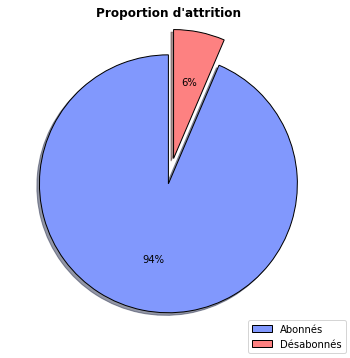

In [ ]:
proportion_churn(Dataset, 'is_churn')

In [ ]:
# Split
r =  40
Train, REM = train_test_split(Dataset, train_size=0.7, stratify = Dataset['is_churn'], random_state = r)
Valid, Test = train_test_split(REM, test_size=0.2, stratify = REM['is_churn'], random_state = r)
print(f'Dimensions Train : {Train.shape}')
print(f'Dimensions Valid : {Valid.shape}')
print(f'Dimensions Test  : {Test.shape}\n')

# Vérification de la proportion churn:
ratio_churn(Train,'Train')
ratio_churn(Valid,'Valid')
ratio_churn(Test,'Test')

# Définition de features X et Target Y
X_train = Train.drop(['msno','is_churn'], axis = 1)
y_train = Train['is_churn'].astype(int)

X_valid = Valid.drop(['msno','is_churn'], axis = 1)
y_valid = Valid['is_churn'].astype(int)

print("\nDimension X_train dataset: ", X_train.shape)
print("Dimension y_train dataset: ",   y_train.shape)
print("Dimension X_valid dataset: ",   X_valid.shape)
print("Dimension y_valid dataset: ",   y_valid.shape)

# Standardisation des données
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

#scaler = joblib.dump(sc_X, '/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/ScalerXGBC_BF.joblib')

X_valid2 = pd.DataFrame(sc_X.transform(X_valid))
X_valid2.columns = X_valid.columns.values
X_valid2.index = X_valid.index.values
X_valid = X_valid2

Dimensions Train : (508005, 90)
Dimensions Valid : (174173, 90)
Dimensions Test  : (43544, 90)

Proportion désabonnés sur Train :	6.42 %
Proportion désabonnés sur Valid :	6.42 %
Proportion désabonnés sur Test :	6.42 %

Dimension X_train dataset:  (508005, 88)
Dimension y_train dataset:  (508005,)
Dimension X_valid dataset:  (174173, 88)
Dimension y_valid dataset:  (174173,)


## Cross-Validation

In [ ]:
%%time


models = []
models.append([LogisticRegression(), 'Logistic Regression'])
models.append([GaussianNB(), 'Naive Bayes Classifier'])
models.append([DecisionTreeClassifier(), 'Decision Tree Classifier'])
models.append([RandomForestClassifier(), 'Random Forest Classifier'])
models.append([BaggingClassifier(), 'Bagging Classifier'])
models.append([AdaBoostClassifier(), 'AdaBoost Classifier'])
models.append([LGBMClassifier(metrics = 'binary_logloss', objective='binary'), 'LightGBM Classifier'])
models.append([XGBClassifier(eval_metric = 'logloss', objective = 'binary:logistic', tree_method='hist'), 'XGBoost Classifier'])

# Evaluation des modèles:
names = []
auc_results = []
loss_results = []
f1_results = []
precision_results = []
recall_results = []
MCC_results = []

# Création d'un tableau reportant les performances de chaque modèle:
col = ['Model', 'ROC AUC Mean', 'ROC AUC STD', 'Log loss Mean', 'Log loss STD', 
       'F1 Mean', 'F1 STD', 'Precision Mean', 'Precision STD', 'Recall Mean', 
       'Recall STD', 'MCC Mean', 'MCC STD']

model_results = pd.DataFrame(columns=col)

# Metrics :
scoring = {"AUC": "roc_auc", 
           "Loss": 'neg_log_loss',
           "F1" : 'f1',
           "Precision":'precision',
           "Recall":'recall',
           "MCC": metrics.make_scorer(matthews_corrcoef)}
i = 0

# Evaluation des modèles utilisant le k-fold cross-validation:
for model, name in models:
    print(f'Entrainement en cours sur : {name}')
    
    # Score:
    
    cv_results = model_selection.cross_validate(model, X_train, y_train, cv = StratifiedKFold(5), scoring = scoring)
    
    auc_results.append(cv_results['test_AUC'])
    loss_results.append(cv_results['test_Loss'])
    f1_results.append(cv_results['test_F1'])
    precision_results.append(cv_results['test_Precision'])
    recall_results.append(cv_results['test_Recall'])
    MCC_results.append(cv_results['test_MCC'])
    
    names.append(name)
    model_results.loc[i] = [name,
                            round(cv_results['test_AUC'].mean()*100, 2),
                            round(cv_results['test_AUC'].std()*100, 2),
                            round(cv_results['test_Loss'].mean()*-1, 2),
                            round(cv_results['test_Loss'].std(), 2),
                            round(cv_results['test_F1'].mean()*100, 2),
                            round(cv_results['test_F1'].std()*100, 2),
                            round(cv_results['test_Precision'].mean()*100, 2),
                            round(cv_results['test_Precision'].std()*100, 2),
                            round(cv_results['test_Recall'].mean()*100, 2),
                            round(cv_results['test_Recall'].std()*100, 2),
                            round(cv_results['test_MCC'].mean()*100, 2),
                            round(cv_results['test_MCC'].std()*100, 2)]
    i += 1

Entrainement en cours sur : Logistic Regression
Entrainement en cours sur : Naive Bayes Classifier
Entrainement en cours sur : Decision Tree Classifier
Entrainement en cours sur : Random Forest Classifier
Entrainement en cours sur : Bagging Classifier
Entrainement en cours sur : AdaBoost Classifier
Entrainement en cours sur : LightGBM Classifier
Entrainement en cours sur : XGBoost Classifier
CPU times: user 37min 48s, sys: 29.6 s, total: 38min 18s
Wall time: 35min 54s


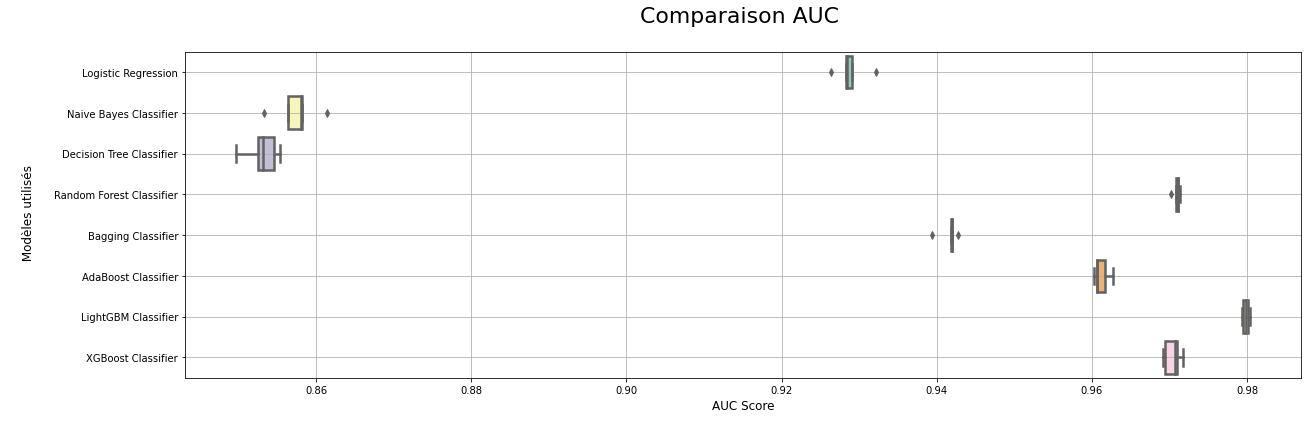

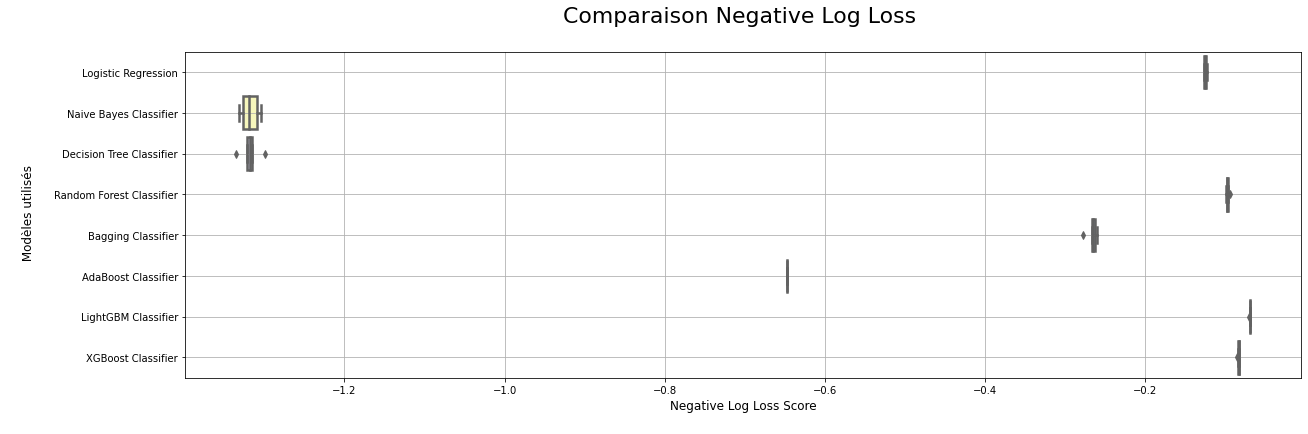

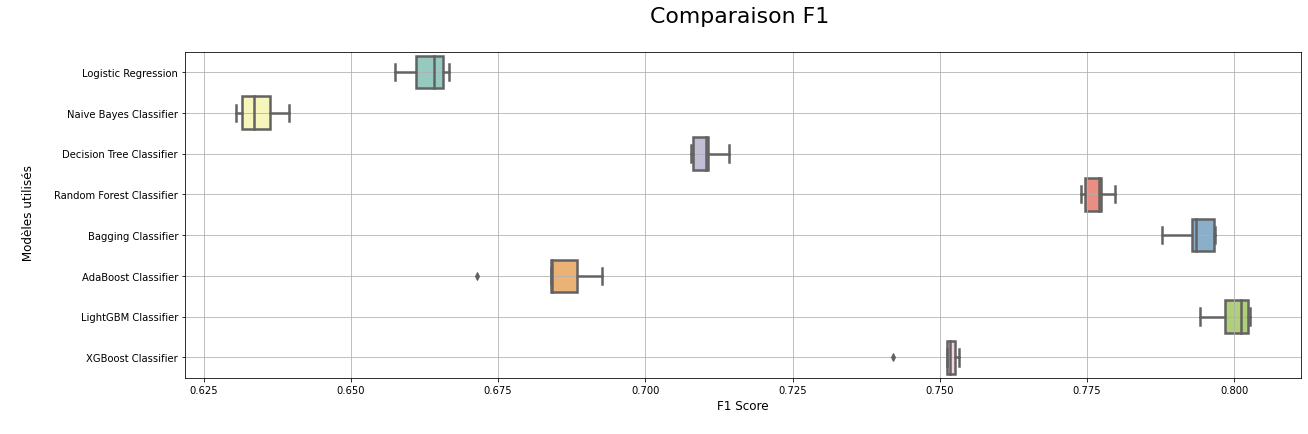

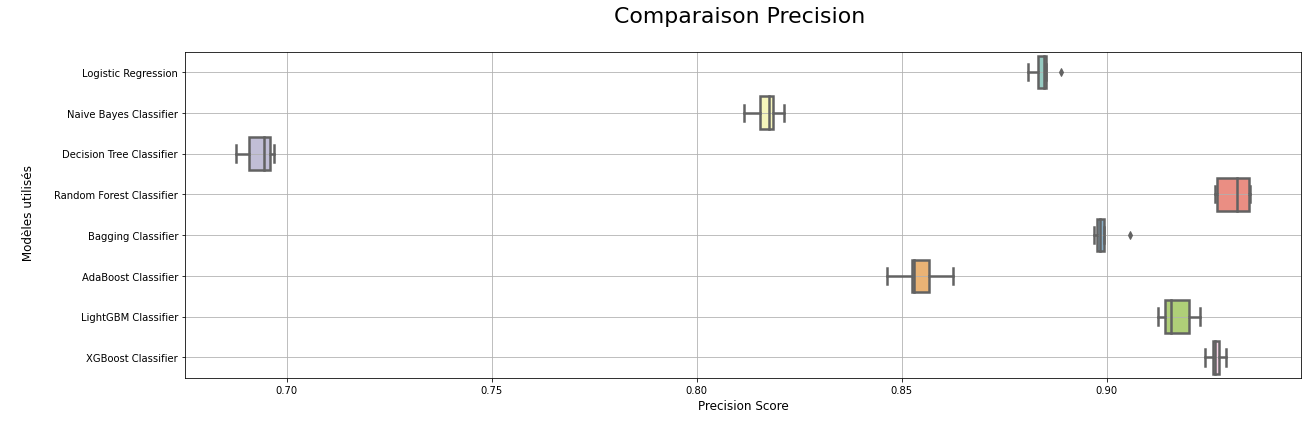

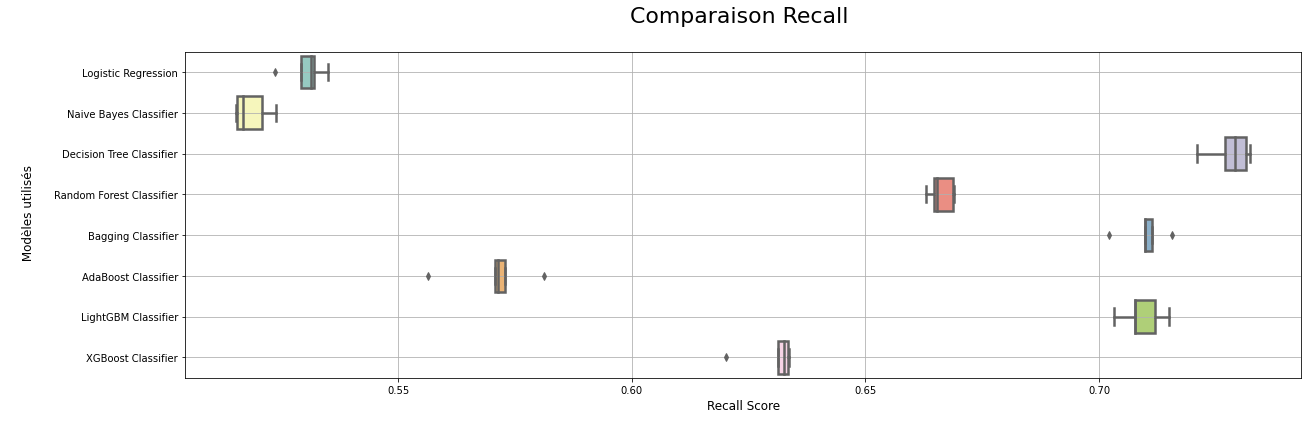

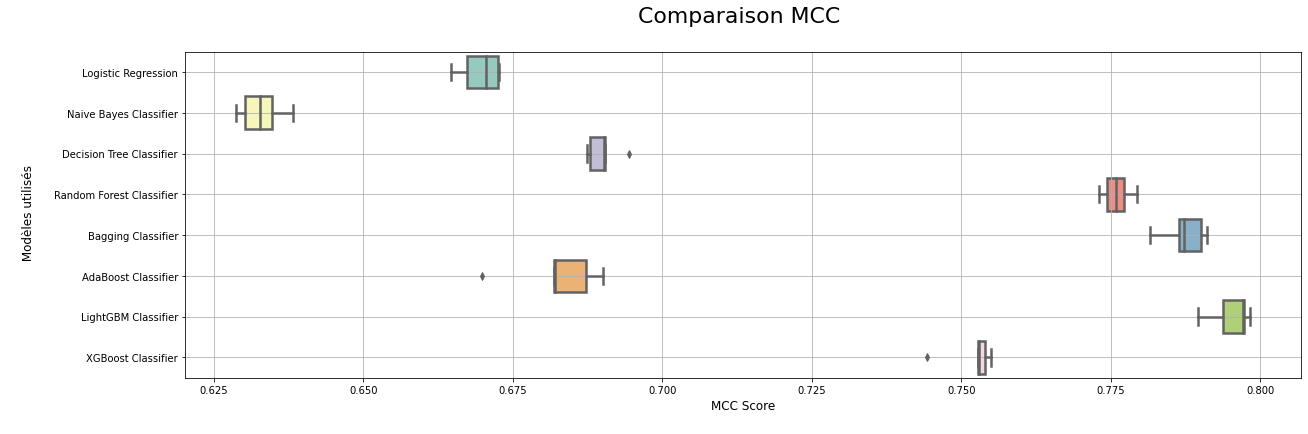

In [ ]:
# Comparaison des métriques avec la cross-validation:
compare_model(auc_results, 'AUC', names)
compare_model(loss_results, 'Negative Log Loss', names)
compare_model(f1_results, 'F1', names)
compare_model(precision_results, 'Precision', names)
compare_model(recall_results, 'Recall', names)
compare_model(MCC_results, 'MCC', names)

In [ ]:
# Bilan de performance:
summary = model_results.drop(['ROC AUC STD', 'Log loss STD', 'F1 STD', 'Precision STD', 'Recall STD', 'MCC STD'],1)
summary.columns = ['Model', 'Roc_AUC', 'Log_loss', 'F1', 'Precision', 'Recall', 'MCC']
summary = summary.sort_values(by = ['Log_loss','Roc_AUC','MCC'], ascending = [True, False, False])
summary

,Model,Roc_AUC,Log_loss,F1,Precision,Recall,MCC
6,LightGBM Classifier,97.99,0.07,79.98,91.70,70.91,79.52
7,XGBoost Classifier,97.04,0.08,75.02,92.66,63.02,75.18
3,Random Forest Classifier,97.09,0.10,77.66,93.10,66.61,77.60
0,Logistic Regression,92.88,0.13,66.30,88.45,53.02,66.96
4,Bagging Classifier,94.16,0.27,79.35,89.96,70.97,78.73
5,AdaBoost Classifier,96.12,0.65,68.41,85.42,57.05,68.22
1,Naive Bayes Classifier,85.74,1.32,63.43,81.69,51.84,63.29
2,Decision Tree Classifier,85.30,1.32,71.02,69.31,72.82,69.00


In [ ]:
# Enregistrement des résultats:
model_results.to_csv('/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/Resultats/model_results.csv', index = False)

## Sélection des Modèles ML

In [ ]:
%%time


models = []
models.append([LogisticRegression(), 'Logistic Regression'])
models.append([GaussianNB(), 'Naive Bayes Classifier'])
models.append([DecisionTreeClassifier(), 'Decision Tree Classifier'])
models.append([RandomForestClassifier(), 'Random Forest Classifier'])
models.append([BaggingClassifier(), 'Bagging Classifier'])
models.append([AdaBoostClassifier(), 'AdaBoost Classifier']) 
models.append([LGBMClassifier(metrics = 'binary_logloss', objective='binary'), 'LightGBM Classifier'])
models.append([XGBClassifier(eval_metric = 'logloss', objective = 'binary:logistic', tree_method='hist'), 'XGBoost Classifier'])

# Création d'un tableau reportant les performances de chaque modèle
evaluation = ['Model', 'Roc_AUC', 'Log_loss', 'F1', 'Precision', 'Recall', 'MCC']
model_validation = pd.DataFrame(columns=evaluation)

i = 0

# Evaluation des modèles utilisant le k-fold cross-validation:
for model, name in models:
    print(f'Entrainement en cours sur : {name}')
    
    # Entrainement et Evaluation:
    
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    probability = model.predict_proba(X_valid)
    probability = probability[:,1]

    auc = metrics.roc_auc_score(y_valid, probability)
    logloss = metrics.log_loss(y_valid, probability)
    f1 = metrics.f1_score(y_valid, y_pred)
    precision = metrics.precision_score(y_valid, y_pred)
    recall = metrics.recall_score(y_valid, y_pred)
    MCC = metrics.matthews_corrcoef(y_valid, y_pred)

    model_validation.loc[i] = [name, auc, logloss, f1, precision, recall, MCC]
    i += 1

Entrainement en cours sur : Logistic Regression
Entrainement en cours sur : Naive Bayes Classifier
Entrainement en cours sur : Decision Tree Classifier
Entrainement en cours sur : Random Forest Classifier
Entrainement en cours sur : Bagging Classifier
Entrainement en cours sur : AdaBoost Classifier
Entrainement en cours sur : LightGBM Classifier
Entrainement en cours sur : XGBoost Classifier
CPU times: user 10min 27s, sys: 9.17 s, total: 10min 36s
Wall time: 10min 20s


In [ ]:
valid_summary = model_validation.sort_values(by = ['Log_loss','Roc_AUC','MCC'], ascending = [True, False, False])
valid_summary

,Model,Roc_AUC,Log_loss,F1,Precision,Recall,MCC
6,LightGBM Classifier,0.980044,0.068710,0.804310,0.920489,0.714171,0.799859
7,XGBoost Classifier,0.970390,0.083011,0.756552,0.935943,0.634868,0.758893
3,Random Forest Classifier,0.970450,0.099631,0.784687,0.936400,0.675279,0.784020
0,Logistic Regression,0.926842,0.125454,0.660648,0.885998,0.526688,0.667852
4,Bagging Classifier,0.940868,0.267411,0.797399,0.905168,0.712561,0.791579
5,AdaBoost Classifier,0.961593,0.646955,0.684219,0.862721,0.566920,0.683719
2,Decision Tree Classifier,0.852974,1.308807,0.711538,0.696024,0.727760,0.691467
1,Naive Bayes Classifier,0.852756,1.327231,0.631377,0.815544,0.515065,0.630143


In [ ]:
valid_summary.to_csv('/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/Resultats/valid_summary.csv', index = False)

## Hyperparamétrages
Quelques paramètres sont utilisés pour la démonstration. L'entrainement et la recherche des meilleures paramètres prend un certain temps au vu de la quantité des données d'entrée. La méthode HalvingGridSearchCV permet de gagner du temps sur l'hyperparamétrage. Elle est plus rapide que GridSearchCV et reste tout aussi efficace.

Pour la démonstration, les paramètres calibrés sont : 
* **N_estimators** : Nombres d'estimateurs
* **Max_Depth** : Profondeur de l'estimateur

### XGBoost Classifier

In [ ]:
%%time

# Hyperparamètres à définir:
HyperParameters = {
    'learning_rate': [0.1, 0.05], 
    'n_estimators':  [100, 150, 200],
    'max_depth':     [6, 9, 12]
    }

# Combinaison de paramètres pour XGBClassifier:
model = XGBClassifier(eval_metric = 'logloss', objective = 'binary:logistic', tree_method='hist')

Optimal_XGBC = HalvingGridSearchCV(model, HyperParameters, n_jobs = -1, min_resources = "exhaust", 
                                factor = 3, cv = StratifiedKFold(3))
Optimal_XGBC.fit(X_train, y_train)

# Affichage des meilleurs paramètres:
print(Optimal_XGBC.best_params_)

y_pred = Optimal_XGBC.predict(X_valid)
probability = Optimal_XGBC.predict_proba(X_valid)
probability = probability[:,1]

auc = metrics.roc_auc_score(y_valid, probability)
logloss = metrics.log_loss(y_valid, probability)
f1 = metrics.f1_score(y_valid, y_pred)
precision = metrics.precision_score(y_valid, y_pred)
recall = metrics.recall_score(y_valid, y_pred)
MCC = metrics.matthews_corrcoef(y_valid, y_pred)

Optimal_XGBC_Resultats = ['Optimal XGBC', auc, logloss, f1, precision, recall, MCC]

{'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 200}
CPU times: user 1min 18s, sys: 1.33 s, total: 1min 19s
Wall time: 12min 32s


Evaluation sur Optimal XGBC


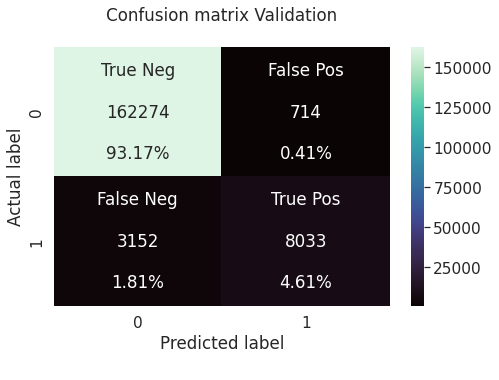

Confiance sur 1 pour probabilité de prédiction > 90 % : 98.0 %
Confiance sur 0 pour probabilité de prédiction < 10 % : 99.0 %
Nombre Utilisateur avec probabilité entre 10 et 90% : 13293 (7.63 %)


In [ ]:
First_Evaluation('Optimal XGBC')

### LightGBM Classifier

In [ ]:
%%time

# Hyperparamètres à définir:
HyperParameters = {
    'learning_rate':  [0.1, 0.05], 
    'n_estimators':   [100, 150, 200],
    'max_depth':      [6, 9, 12]}

# Combinaison de paramètres pour XGBClassifier:
model = LGBMClassifier(metrics = 'binary_logloss', objective='binary')

Optimal_LGBMC = HalvingGridSearchCV(model, HyperParameters, n_jobs = -1, min_resources = "exhaust", 
                                factor = 3, cv = StratifiedKFold(3))
Optimal_LGBMC.fit(X_train, y_train)

# Affichage des meilleurs paramètres:
print(Optimal_LGBMC.best_params_)

y_pred = Optimal_LGBMC.predict(X_valid)
probability = Optimal_LGBMC.predict_proba(X_valid)
probability = probability[:,1]

auc = metrics.roc_auc_score(y_valid, probability)
logloss = metrics.log_loss(y_valid, probability)
f1 = metrics.f1_score(y_valid, y_pred)
precision = metrics.precision_score(y_valid, y_pred)
recall = metrics.recall_score(y_valid, y_pred)
MCC = metrics.matthews_corrcoef(y_valid, y_pred)

Optimal_LGBMC_Resultats = ['Optimal LGBMC', auc, logloss, f1, precision, recall, MCC]

{'learning_rate': 0.1, 'max_depth': 12, 'n_estimators': 100}
CPU times: user 35.5 s, sys: 1.03 s, total: 36.5 s
Wall time: 7min 30s


Evaluation sur Optimal LGBMC


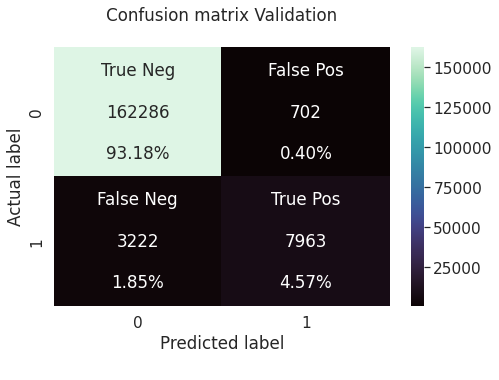

Confiance sur 1 pour probabilité de prédiction > 90 % : 99.0 %
Confiance sur 0 pour probabilité de prédiction < 10 % : 99.0 %
Nombre Utilisateur avec probabilité entre 10 et 90% : 14299 (8.21 %)


In [ ]:
First_Evaluation('Optimal LGBMC')

### Résultats

In [ ]:
col = ['Model', 'Roc_AUC', 'Log_loss', 'F1', 'Precision', 'Recall', 'MCC']
results = [Optimal_XGBC_Resultats, Optimal_LGBMC_Resultats]
model_optimizer = pd.DataFrame(results, columns=col)
model_optimizer

,Model,Roc_AUC,Log_loss,F1,Precision,Recall,MCC
0,Optimal XGBC,0.980483,0.068104,0.806041,0.918372,0.718194,0.801215
1,Optimal LGBMC,0.979739,0.069413,0.802317,0.918984,0.711936,0.797825


In [ ]:
model_optimizer.to_csv('/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/Resultats/model_optimizer.csv', index = False)

## Conception de Réseaux de Neurones Artificiels

In [ ]:
# Création d'un tableau reportant les performances de chaque modèle
col = ['Model', 'Roc_AUC', 'Log_loss', 'F1', 'Precision', 'Recall', 'MCC', 'Density Layer', 'Learning Rate']
MLPerceptron_results = pd.DataFrame(columns=col)

def MLPerceptron(DL1, DL2, DL3, Alpha, Epochs, Name, MLPerceptron_results):
    Model = keras.Sequential([keras.layers.Dense(DL1, input_shape=(88,), activation='relu'),
                              keras.layers.Dense(DL2, activation='relu'),
                              keras.layers.Dense(DL3, activation='relu'),
                              keras.layers.Dense(1, activation='sigmoid')])

    AUC = keras.metrics.AUC()
    Recall = keras.metrics.Recall()
    Precision = keras.metrics.Precision()

    Model.compile(optimizer= optimizers.Adamax(learning_rate = Alpha),
                    loss = 'binary_crossentropy', metrics = [AUC, Recall, Precision])
    
    history = Model.fit(X_train, y_train, epochs = Epochs, batch_size = 256, validation_split = 0.2)

    fig, ax = plt.subplots(1,2, figsize = (22, 7))
    plt.subplot(121)
    plt.plot(history.history[list(history.history)[0]])
    plt.plot(history.history[list(history.history)[4]])
    plt.title('Apprentissage sur Score Loss')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Valid'], loc='upper left')

    plt.subplot(122)
    plt.plot(history.history[list(history.history)[2]])
    plt.plot(history.history[list(history.history)[6]])
    plt.title('Apprentissage sur Score Recall')
    plt.ylabel('Recall')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Valid'], loc='lower right')
    plt.show()
    
    y_pred = Model.predict(X_valid)

    threshold = []
    for i in y_pred:
        if i>0.5:
            threshold.append(1)
        else:
            threshold.append(0)
    
    result_MLP = Model.evaluate(X_valid, y_valid, verbose = 0)
    f1 = metrics.f1_score(y_valid, threshold)
    MCC = metrics.matthews_corrcoef(y_valid, threshold)
    col = ['Model', 'Roc_AUC', 'Log_loss', 'F1', 'Precision', 'Recall', 'MCC', 'Density Layer', 'Learning Rate']
    Result = pd.DataFrame([[Name, result_MLP[1], result_MLP[0], f1, result_MLP[3], result_MLP[2], MCC, [DL1, DL2, DL3], Alpha]], columns = col)
    MLPerceptron_results = MLPerceptron_results.append(Result)  
    return MLPerceptron_results    

Epoch 1/320
1588/1588 [==============================] - 6s 3ms/step - loss: 0.1581 - auc: 0.8722 - recall: 0.3312 - precision: 0.9258 - val_loss: 0.1203 - val_auc: 0.9238 - val_recall: 0.5183 - val_precision: 0.9071
Epoch 2/320
1588/1588 [==============================] - 4s 2ms/step - loss: 0.1106 - auc: 0.9410 - recall: 0.5331 - precision: 0.9010 - val_loss: 0.1075 - val_auc: 0.9415 - val_recall: 0.5412 - val_precision: 0.8899
Epoch 3/320
1588/1588 [==============================] - 4s 3ms/step - loss: 0.1031 - auc: 0.9499 - recall: 0.5473 - precision: 0.8874 - val_loss: 0.1035 - val_auc: 0.9463 - val_recall: 0.5545 - val_precision: 0.8870
Epoch 4/320
1588/1588 [==============================] - 4s 3ms/step - loss: 0.1001 - auc: 0.9536 - recall: 0.5575 - precision: 0.8986 - val_loss: 0.1010 - val_auc: 0.9507 - val_recall: 0.5656 - val_precision: 0.8988
Epoch 5/320
1588/1588 [==============================] - 4s 3ms/step - loss: 0.0980 - auc: 0.9556 - recall: 0.5613 - precision: 0.90

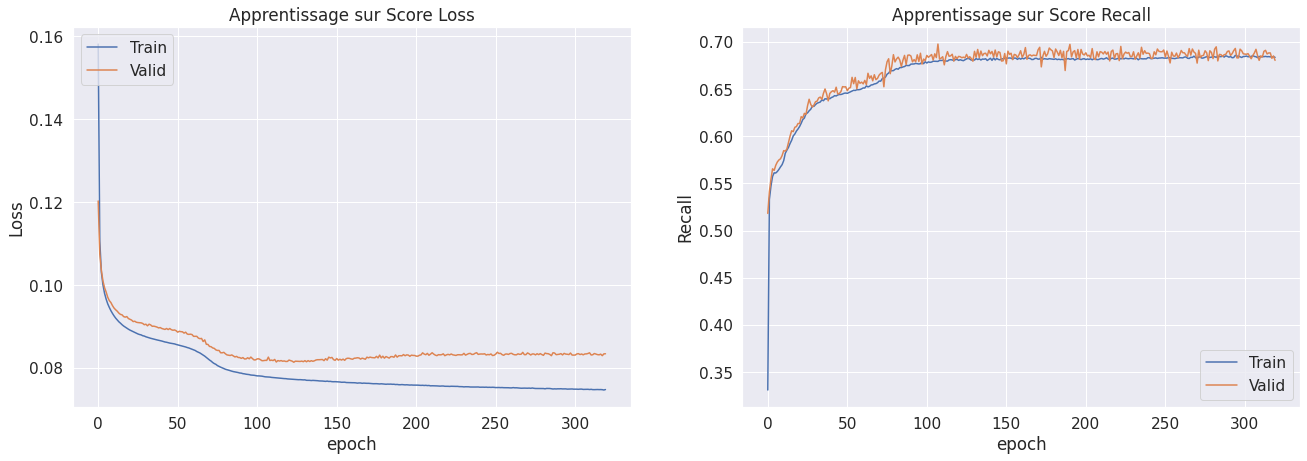

In [ ]:
MLP1 = MLPerceptron(DL1=20, DL2=15, DL3=10, Alpha=0.001,  Epochs=320, Name='MLPerceptron Model 1', MLPerceptron_results=MLPerceptron_results)

Epoch 1/320
1588/1588 [==============================] - 6s 3ms/step - loss: 0.1403 - auc_1: 0.8923 - recall_1: 0.4670 - precision_1: 0.8746 - val_loss: 0.1139 - val_auc_1: 0.9348 - val_recall_1: 0.5314 - val_precision_1: 0.8964
Epoch 2/320
1588/1588 [==============================] - 4s 3ms/step - loss: 0.1059 - auc_1: 0.9475 - recall_1: 0.5396 - precision_1: 0.8974 - val_loss: 0.1035 - val_auc_1: 0.9483 - val_recall_1: 0.5434 - val_precision_1: 0.8865
Epoch 3/320
1588/1588 [==============================] - 4s 3ms/step - loss: 0.0988 - auc_1: 0.9549 - recall_1: 0.5521 - precision_1: 0.9010 - val_loss: 0.0985 - val_auc_1: 0.9534 - val_recall_1: 0.5669 - val_precision_1: 0.8929
Epoch 4/320
1588/1588 [==============================] - 4s 3ms/step - loss: 0.0954 - auc_1: 0.9576 - recall_1: 0.5697 - precision_1: 0.9060 - val_loss: 0.0971 - val_auc_1: 0.9525 - val_recall_1: 0.5660 - val_precision_1: 0.9115
Epoch 5/320
1588/1588 [==============================] - 4s 3ms/step - loss: 0.0934 

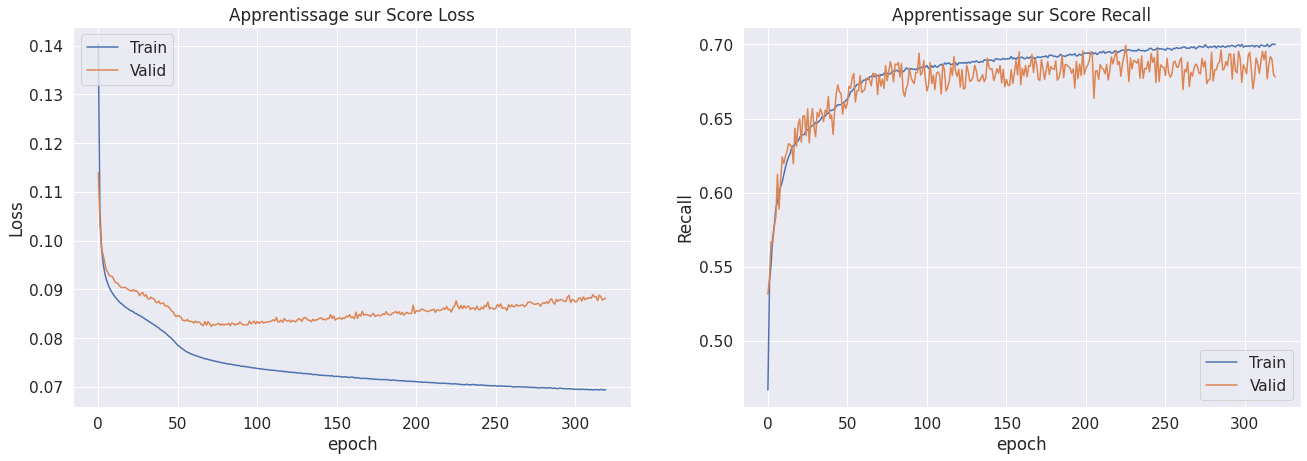

In [ ]:
MLP2 = MLPerceptron(DL1=40, DL2=30, DL3=20, Alpha=0.001,  Epochs=320, Name='MLPerceptron Model 2', MLPerceptron_results=MLPerceptron_results)

Epoch 1/320
1588/1588 [==============================] - 7s 3ms/step - loss: 0.1846 - auc_2: 0.8330 - recall_2: 0.3697 - precision_2: 0.5623 - val_loss: 0.1272 - val_auc_2: 0.9034 - val_recall_2: 0.5066 - val_precision_2: 0.9289
Epoch 2/320
1588/1588 [==============================] - 5s 3ms/step - loss: 0.1187 - auc_2: 0.9259 - recall_2: 0.5137 - precision_2: 0.9293 - val_loss: 0.1148 - val_auc_2: 0.9337 - val_recall_2: 0.5269 - val_precision_2: 0.9114
Epoch 3/320
1588/1588 [==============================] - 4s 3ms/step - loss: 0.1092 - auc_2: 0.9433 - recall_2: 0.5350 - precision_2: 0.9100 - val_loss: 0.1085 - val_auc_2: 0.9434 - val_recall_2: 0.5423 - val_precision_2: 0.8865
Epoch 4/320
1588/1588 [==============================] - 4s 3ms/step - loss: 0.1039 - auc_2: 0.9500 - recall_2: 0.5421 - precision_2: 0.8968 - val_loss: 0.1046 - val_auc_2: 0.9474 - val_recall_2: 0.5511 - val_precision_2: 0.8762
Epoch 5/320
1588/1588 [==============================] - 4s 3ms/step - loss: 0.1005 

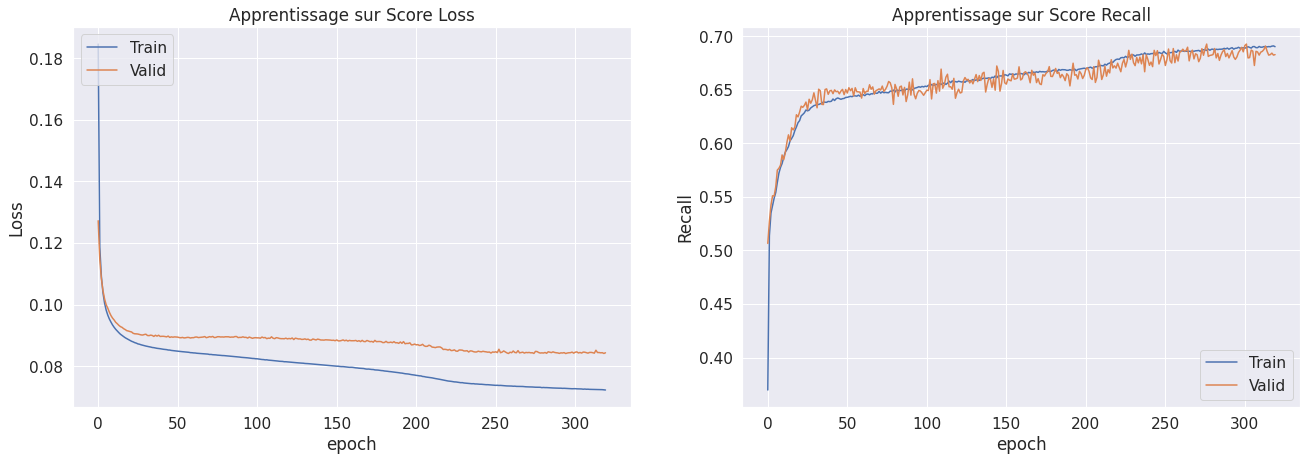

In [ ]:
MLP3 = MLPerceptron(DL1=40, DL2=30, DL3=20, Alpha=0.0005, Epochs=320, Name='MLPerceptron Model 3', MLPerceptron_results=MLPerceptron_results)

In [ ]:
MLPerceptron_results = MLPerceptron_results.append([MLP1, MLP2, MLP3])
MLPerceptron_results

,Model,Roc_AUC,Log_loss,F1,Precision,Recall,MCC,Density Layer,Learning Rate
0,MLPerceptron Model 1,0.968977,0.080147,0.772868,0.911554,0.670809,0.769819,"[20, 15, 10]",0.0010
0,MLPerceptron Model 2,0.965401,0.085180,0.766715,0.906330,0.664372,0.763511,"[40, 30, 20]",0.0010
0,MLPerceptron Model 3,0.965855,0.083612,0.770130,0.903164,0.671256,0.766173,"[40, 30, 20]",0.0005


In [ ]:
MLPerceptron_results.to_csv('/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/Resultats/MLPerceptron_results.csv', index = False)

## Modèles Stacking
Il s'agit d'essais sur l'utilisation des modèles Stacking.

In [ ]:
col = ['Model', 'Roc_AUC', 'Log_loss', 'F1', 'Precision', 'Recall', 'MCC']
Stacking_results = pd.DataFrame(columns = col)

def Stacking_models(estimators, final_estimators, Stacking_results, Name):
    stacking_model = StackingClassifier(estimators=estimators, final_estimator = final_estimators)
    Stacking = stacking_model.fit(X_train, y_train)

    y_pred = Stacking.predict(X_valid)
    probability = Stacking.predict_proba(X_valid)
    probability = probability[:,1]

    auc = metrics.roc_auc_score(y_valid, probability)
    logloss = metrics.log_loss(y_valid, probability)
    f1 = metrics.f1_score(y_valid, y_pred)
    precision = metrics.precision_score(y_valid, y_pred)
    recall = metrics.recall_score(y_valid, y_pred)
    MCC = metrics.matthews_corrcoef(y_valid, y_pred)
    
    col = ['Model', 'Roc_AUC', 'Log_loss', 'F1', 'Precision', 'Recall', 'MCC']
    Result = pd.DataFrame([[Name, auc, logloss, f1, precision, recall, MCC]], columns = col)
    Stacking_results = Stacking_results.append(Result)  
    return Stacking_results    

In [ ]:
%%time


estimators_1 = [('LGBMC', LGBMClassifier(metrics = 'binary_logloss', objective = 'binary')),
              ('XGBC',  XGBClassifier(eval_metric = 'logloss', objective = 'binary:logistic', tree_method='hist'))]

final_estimators_1 = LogisticRegression()

Stacking1 = Stacking_models(estimators_1, final_estimators_1, Stacking_results, 'Stacking Model 1')

CPU times: user 4min 18s, sys: 2.39 s, total: 4min 20s
Wall time: 4min 18s


In [ ]:
%%time


estimators_2 = [('LGBMC', LGBMClassifier(metrics = 'binary_logloss', objective = 'binary', **Optimal_LGBMC.best_params_)),
              ('XGBC',  XGBClassifier(eval_metric = 'logloss', objective = 'binary:logistic', tree_method='hist', **Optimal_XGBC.best_params_))]

final_estimators_2 = LogisticRegression()

Stacking2 = Stacking_models(estimators_2, final_estimators_2, Stacking_results, 'Stacking Model 2')

CPU times: user 8min 14s, sys: 2.95 s, total: 8min 17s
Wall time: 8min 13s


In [ ]:
%%time


estimators_3 = [('LGBMC', LGBMClassifier(metrics = 'binary_logloss', objective = 'binary', **Optimal_LGBMC.best_params_)),
              ('XGBC',  XGBClassifier(eval_metric = 'logloss', objective = 'binary:logistic', tree_method='hist', **Optimal_XGBC.best_params_))]

final_estimators_3 = LGBMClassifier(metrics = 'binary_logloss', objective = 'binary')

Stacking3 = Stacking_models(estimators_3, final_estimators_3, Stacking_results, 'Stacking Model 3')

CPU times: user 8min 25s, sys: 2.93 s, total: 8min 27s
Wall time: 8min 25s


In [ ]:
Stacking_results = Stacking_results.append([Stacking1, Stacking2, Stacking3])
Stacking_results

,Model,Roc_AUC,Log_loss,F1,Precision,Recall,MCC
0,Stacking Model 1,0.979646,0.083043,0.802425,0.912499,0.716048,0.797141
0,Stacking Model 2,0.980413,0.081709,0.807214,0.918063,0.720250,0.802274
0,Stacking Model 3,0.979179,0.099691,0.801269,0.898921,0.722754,0.794494


In [ ]:
Stacking_results.to_csv('/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/Resultats/Stacking_results.csv', index = False)

## Premier Bilan et Sélection du Modèle

In [ ]:
Standard_Model     = pd.read_csv('/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/Resultats/valid_summary.csv')
Optimized_Model    = pd.read_csv('/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/Resultats/model_optimizer.csv')
Stacking_Model     = pd.read_csv('/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/Resultats/Stacking_results.csv')
MLPerceptron_Model = pd.read_csv('/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/Resultats/MLPerceptron_results.csv')

MLPerceptron_Model = MLPerceptron_Model.drop(['Density Layer', 'Learning Rate'],1)

col = ['Model', 'Roc_AUC', 'Log_loss', 'F1', 'Precision', 'Recall', 'MCC']
Bilan = pd.DataFrame(Standard_Model, columns = col)
Bilan = Bilan.append(Stacking_Model, 0)
Bilan = Bilan.append(Optimized_Model,0)
Bilan = Bilan.append(MLPerceptron_Model)

Bilan = Bilan.sort_values(by = ['Log_loss','Recall','MCC'], ascending = [True, False, False])
Bilan

,Model,Roc_AUC,Log_loss,F1,Precision,Recall,MCC
0,Optimal XGBC,0.980483,0.068104,0.806041,0.918372,0.718194,0.801215
0,LightGBM Classifier,0.980044,0.068710,0.804310,0.920489,0.714171,0.799859
1,Optimal LGBMC,0.979739,0.069413,0.802317,0.918984,0.711936,0.797825
0,MLPerceptron Model 1,0.968977,0.080147,0.772868,0.911554,0.670809,0.769819
1,Stacking Model 2,0.980413,0.081709,0.807214,0.918063,0.720250,0.802274
1,XGBoost Classifier,0.970390,0.083011,0.756552,0.935943,0.634868,0.758893
0,Stacking Model 1,0.979646,0.083043,0.802425,0.912499,0.716048,0.797141
2,MLPerceptron Model 3,0.965855,0.083612,0.770130,0.903164,0.671256,0.766173
1,MLPerceptron Model 2,0.965401,0.085180,0.766715,0.906330,0.664372,0.763511
2,Random Forest Classifier,0.970450,0.099631,0.784687,0.936400,0.675279,0.784020


## Feature Importance et Réduction de dimension sur le modèle choisi

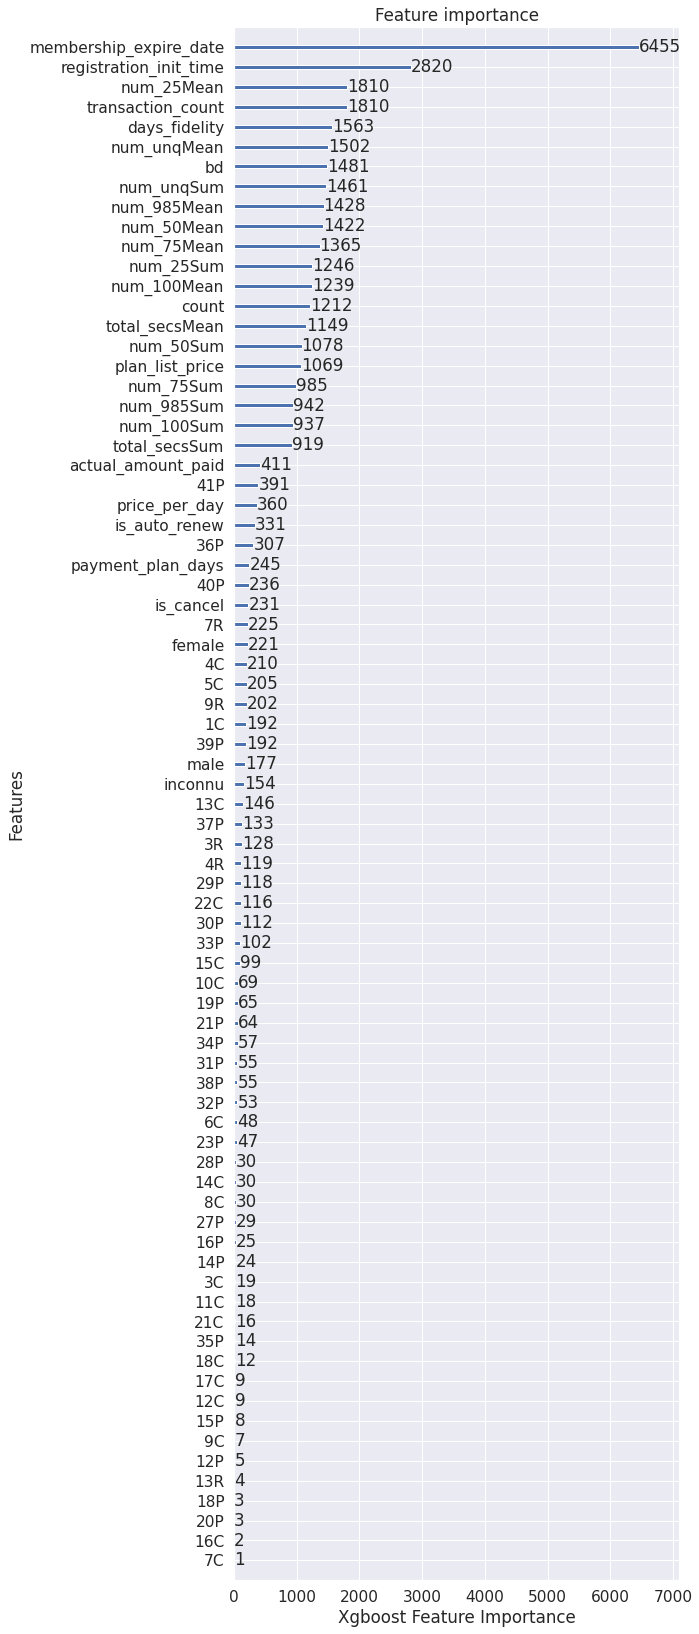

In [ ]:
# Initialisation sur le modèle le plus performant:
XGBC = XGBClassifier(eval_metric = 'logloss', objective = 'binary:logistic', tree_method = 'hist', learning_rate = 0.05, max_depth = 9, n_estimators = 200)
XGBC = XGBC.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(10,23))
xgboost.plot_importance(XGBC, ax = ax)

plt.xlabel("Xgboost Feature Importance")
plt.tight_layout()
plt.savefig('/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/Resultats/Xgboost Feature Importance2.png')
plt.show()

In [ ]:
thresholds = np.sort(XGBC.feature_importances_)
thresholds = thresholds[55:]
thresholds

array([0.00187445, 0.00207596, 0.0023058 , 0.00242741, 0.00260919,
       0.00263475, 0.0027019 , 0.00279181, 0.00305871, 0.00320965,
       0.00341485, 0.00371636, 0.00392602, 0.00412734, 0.00524712,
       0.00562364, 0.00582716, 0.005958  , 0.00605766, 0.00620898,
       0.00645114, 0.00670503, 0.01257618, 0.01358438, 0.0192219 ,
       0.02018568, 0.02978984, 0.03029844, 0.0356246 , 0.044622  ,
       0.14471647, 0.15932919, 0.3458848 ], dtype=float32)

In [ ]:
%%time


Results_thresh = []

for thresh in thresholds:
    # sélection des variables avec un seuil:
    selection = feature_selection.SelectFromModel(XGBC, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)

    selection_model = XGBClassifier(eval_metric = 'logloss', objective = 'binary:logistic', tree_method = 'hist', learning_rate = 0.05, max_depth = 9, n_estimators = 200)
    selection_model.fit(select_X_train, y_train)

    select_X_valid = selection.transform(X_valid)
    predictions = selection_model.predict(select_X_valid)
    probability = selection_model.predict_proba(select_X_valid)
    probability = probability[:,1]
    auc = metrics.roc_auc_score(y_valid, probability)
    logloss = metrics.log_loss(y_valid, probability)
    f1 = metrics.f1_score(y_valid, predictions)
    MCC = metrics.matthews_corrcoef(y_valid, predictions)
    Results_thresh.append([select_X_train.shape[1], auc, logloss, f1, MCC])

    print(f"N = {select_X_train.shape[1]}\tAUC = {round(auc,5)}\tLoss = {round(logloss,5)}\tF1 = {round(f1,5)}\tMCC = {round(MCC,5)}")

N = 33	AUC = 0.98146	Loss = 0.06668	F1 = 0.80783	MCC = 0.80318
N = 32	AUC = 0.98141	Loss = 0.06677	F1 = 0.80737	MCC = 0.80277
N = 31	AUC = 0.98148	Loss = 0.06663	F1 = 0.80825	MCC = 0.80354
N = 30	AUC = 0.98146	Loss = 0.06667	F1 = 0.80878	MCC = 0.80405
N = 29	AUC = 0.9815	Loss = 0.06662	F1 = 0.80817	MCC = 0.80359
N = 28	AUC = 0.98143	Loss = 0.06677	F1 = 0.8073	MCC = 0.80278
N = 27	AUC = 0.98145	Loss = 0.0667	F1 = 0.80741	MCC = 0.80278
N = 26	AUC = 0.98149	Loss = 0.06663	F1 = 0.80788	MCC = 0.80312
N = 25	AUC = 0.98117	Loss = 0.06731	F1 = 0.80673	MCC = 0.80215
N = 24	AUC = 0.98125	Loss = 0.06724	F1 = 0.80689	MCC = 0.80227
N = 23	AUC = 0.98126	Loss = 0.0672	F1 = 0.80693	MCC = 0.80225
N = 22	AUC = 0.97858	Loss = 0.07098	F1 = 0.78848	MCC = 0.78633
N = 21	AUC = 0.97858	Loss = 0.07096	F1 = 0.78922	MCC = 0.78649
N = 20	AUC = 0.97849	Loss = 0.07107	F1 = 0.78917	MCC = 0.78689
N = 19	AUC = 0.97854	Loss = 0.07108	F1 = 0.78736	MCC = 0.78554
N = 18	AUC = 0.9782	Loss = 0.07131	F1 = 0.78844	MCC = 0.786

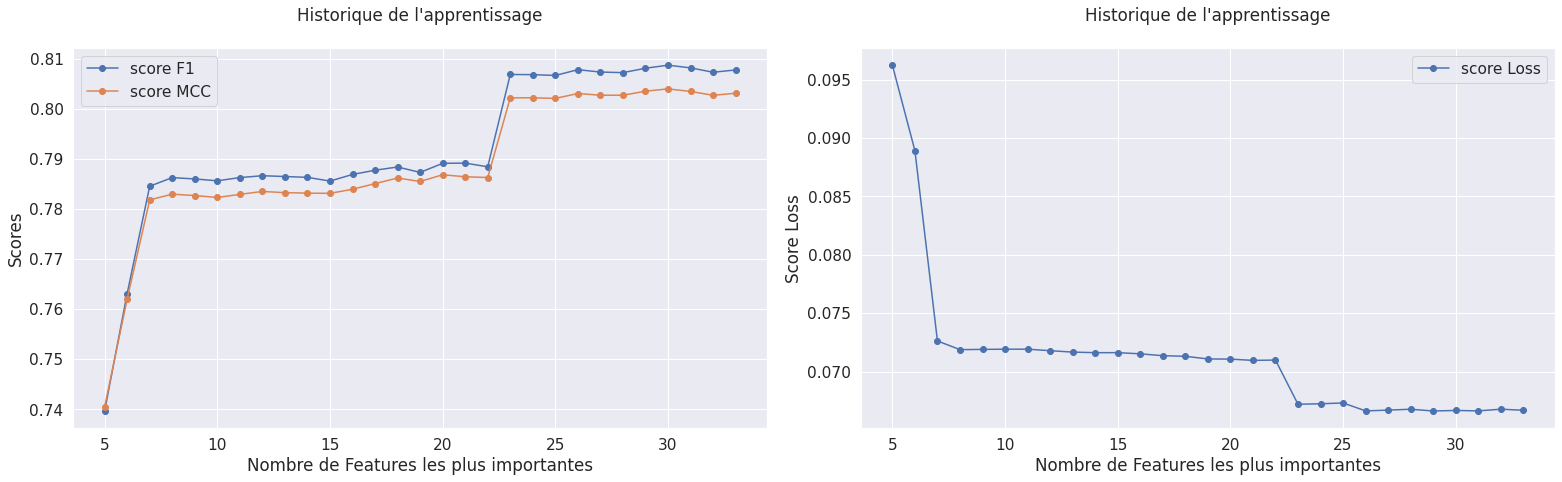

In [ ]:
col = ['Nb Features', 'Roc_AUC', 'Log_loss', 'F1', 'MCC']
Reduction = pd.DataFrame(Results_thresh, columns = col)

# N Features les plus importantes:
N = Reduction['Nb Features']

fig, ax = plt.subplots(1,2, figsize = (22, 7))
plt.subplot(121)
plt.plot(N[:-4], Reduction['F1'][:-4], '-o', label = 'score F1')
plt.plot(N[:-4], Reduction['MCC'][:-4], '-o', label = 'score MCC')
plt.title('Historique de l\'apprentissage\n')
plt.ylabel('Scores')
plt.xlabel('Nombre de Features les plus importantes')
plt.legend()

plt.subplot(122)
plt.plot(N[:-4], Reduction['Log_loss'][:-4], '-o', label = 'score Loss')
plt.title('Historique de l\'apprentissage\n')
plt.ylabel('Score Loss')
plt.xlabel('Nombre de Features les plus importantes')
plt.legend()

plt.tight_layout()
#plt.savefig('/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/Resultats/Score_BestFeatures_Nb.png')
plt.show()

In [ ]:
selection = feature_selection.SelectFromModel(XGBC, threshold=0.0024073643, prefit=True)
select_X_train = selection.transform(X_train)

selection_model = XGBClassifier(eval_metric = 'logloss', objective = 'binary:logistic', tree_method = 'hist', learning_rate = 0.05, max_depth = 9, n_estimators = 200)
selection_model.fit(select_X_train, y_train)

select_X_valid = selection.transform(X_valid)
predictions = selection_model.predict(select_X_valid)
probability = selection_model.predict_proba(select_X_valid)
probability = probability[:,1]

auc = metrics.roc_auc_score(y_valid, probability)
logloss = metrics.log_loss(y_valid, probability)
f1 = metrics.f1_score(y_valid, predictions)
precision = metrics.precision_score(y_valid, predictions)
recall = metrics.recall_score(y_valid, predictions)
MCC = metrics.matthews_corrcoef(y_valid, predictions)

print(f'N : {30}\t LogLoss : {logloss}\t AUC : {auc}\t F1 : {f1}\t Recall : {recall}\t Precision : {precision}\t MCC : {MCC}')

N : 30	 LogLoss : 0.06630417569331172	 AUC : 0.9812439781953555	 F1 : 0.813072418797858	 Recall : 0.7262405006705409	 Precision : 0.9234879490677581	 MCC : 0.8083879349103141


In [ ]:
Features_importance = pd.DataFrame(columns = ['Features', 'Score'])
Features_importance['Features'] = [key for key in XGBC.get_booster().get_fscore().keys()]
Features_importance['Score'] = [value for value in XGBC.get_booster().get_fscore().values()]
Features_importance = Features_importance.sort_values(by = 'Score', ascending = False)

In [ ]:
Selection_Features = Features_importance['Features'][:30].tolist()
X_train_selection = X_train[Selection_Features]
X_valid_selection = X_valid[Selection_Features]

Model = XGBClassifier(eval_metric = 'logloss', objective = 'binary:logistic', tree_method = 'hist', learning_rate = 0.05, max_depth = 9, n_estimators = 200)
Model.fit(X_train_selection, y_train)

y_pred = Model.predict(X_valid_selection)
probability = Model.predict_proba(X_valid_selection)
probability = probability[:,1]

auc = metrics.roc_auc_score(y_valid, probability)
logloss = metrics.log_loss(y_valid, probability)
f1 = metrics.f1_score(y_valid, y_pred)
precision = metrics.precision_score(y_valid, y_pred)
recall = metrics.recall_score(y_valid, y_pred)
MCC = metrics.matthews_corrcoef(y_valid, y_pred)

print(f'N : {30}\t LogLoss : {logloss}\t AUC : {auc}\t F1 : {f1}\t Recall : {recall}\t Precision : {precision}\t MCC : {MCC}')

N : 30	 LogLoss : 0.06898904309133241	 AUC : 0.9787281829557642	 F1 : 0.8082994142757868	 Recall : 0.7279392042914617	 Precision : 0.9086039504519585	 MCC : 0.8022017200736086


In [ ]:
colonnes = Selection_Features

In [ ]:
filename = '/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/XGBC_BF.joblib'
joblib.dump(colonnes, '/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/ColonnesXGBC_BF.joblib')
joblib.dump(Model, filename)

In [ ]:
import joblib
joblib.__version__

'1.1.0'

In [ ]:
#Features_importance.to_csv('/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/Resultats/Features_importance.csv', index = False)

## Comparaison des modèles XGBoost Classifier

In [ ]:
XGBC = XGBClassifier(eval_metric = 'logloss', objective = 'binary:logistic', tree_method = 'hist')
XGBC_OPT = XGBClassifier(eval_metric = 'logloss', objective = 'binary:logistic', tree_method = 'hist', learning_rate = 0.05, max_depth = 9, n_estimators = 200)
XGBC_OPT2 = XGBClassifier(eval_metric = 'logloss', objective = 'binary:logistic', tree_method = 'hist', learning_rate = 0.05, max_depth = 9, n_estimators = 200)

col = Features_importance['Features'][:30].tolist()
X_train_select = X_train[col]
X_valid_select = X_valid[col]

model1 = XGBC.fit(X_train, y_train)
model2 = XGBC_OPT.fit(X_train, y_train)
model3 = XGBC_OPT2.fit(X_train_select, y_train)

y_pred1 = model1.predict(X_valid)
y_pred2 = model2.predict(X_valid)
y_pred3 = model3.predict(X_valid_select)

In [ ]:
probability1 = model1.predict_proba(X_valid)
probability2 = model2.predict_proba(X_valid)
probability3 = model3.predict_proba(X_valid_select)

probability1 = probability1[:,1]
probability2 = probability2[:,1]
probability3 = probability3[:,1]

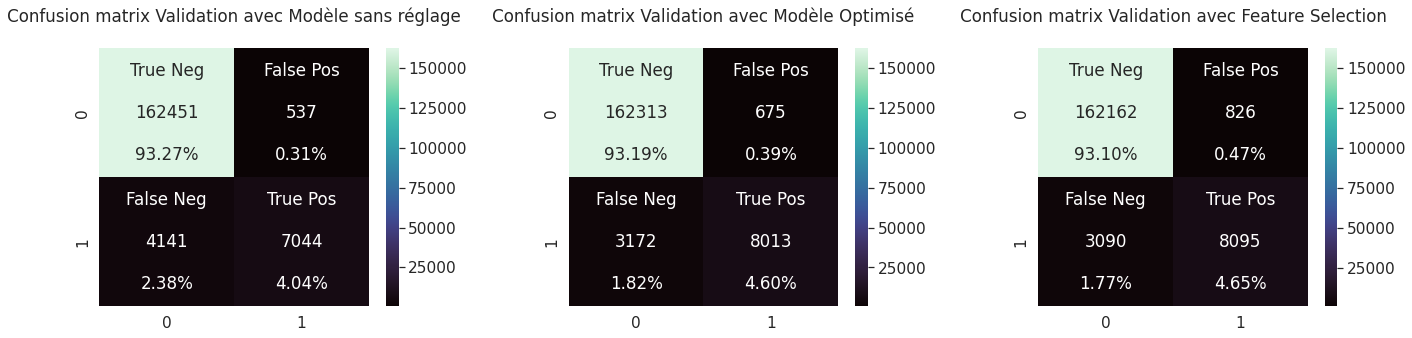

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
df_cm = confusion_matrix(y_valid, y_pred1) 
group_names = ["True Neg\n", "False Pos\n", "False Neg\n", "True Pos\n"]
group_counts = ["{0:0.0f}\n".format(value) for value in df_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in df_cm.flatten()/np.sum(df_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.set(font_scale=1.4)
sn.heatmap(df_cm,  ax = ax[0], annot=labels, fmt="", cmap='mako').set_title('Confusion matrix Validation avec Modèle sans réglage\n')
class_names=[0,1]
tick_marks = np.arange(len(class_names))

df_cm = confusion_matrix(y_valid, y_pred2) 
group_names = ["True Neg\n", "False Pos\n", "False Neg\n", "True Pos\n"]
group_counts = ["{0:0.0f}\n".format(value) for value in df_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in df_cm.flatten()/np.sum(df_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.set(font_scale=1.4)
sn.heatmap(df_cm, ax = ax[1], annot=labels, fmt="", cmap='mako').set_title('Confusion matrix Validation avec Modèle Optimisé\n')
class_names=[0,1]
tick_marks = np.arange(len(class_names))

df_cm = confusion_matrix(y_valid, y_pred3) 
group_names = ["True Neg\n", "False Pos\n", "False Neg\n", "True Pos\n"]
group_counts = ["{0:0.0f}\n".format(value) for value in df_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in df_cm.flatten()/np.sum(df_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.set(font_scale=1.4)
sn.heatmap(df_cm, ax = ax[2], annot=labels, fmt="", cmap='mako').set_title('Confusion matrix Validation avec Feature Selection\n')
class_names=[0,1]
tick_marks = np.arange(len(class_names))

plt.tight_layout()
plt.savefig('/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/Resultats/Matrix Comparaison.png')
plt.show()

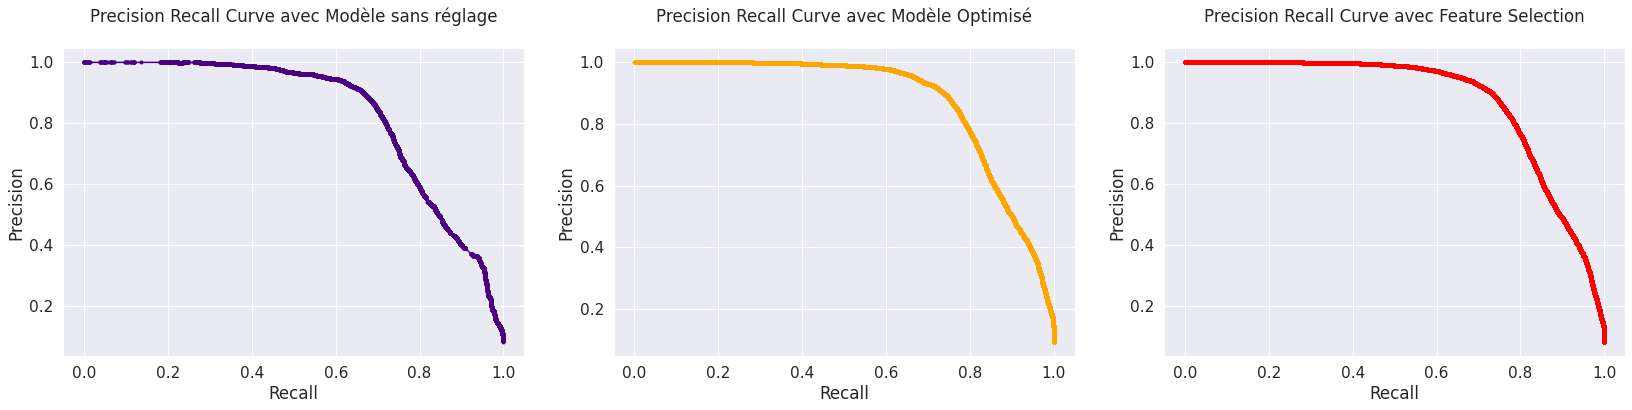

In [ ]:
curve_precision1, curve_recall1, _ = precision_recall_curve(y_valid, probability1)
curve_precision2, curve_recall2, _ = precision_recall_curve(y_valid, probability2)
curve_precision3, curve_recall3, _ = precision_recall_curve(y_valid, probability3)

fig, ax = plt.subplots(1, 3, figsize = (23, 6))
ax[0].plot(curve_recall1, curve_precision1, color = 'indigo', marker = '.')
ax[1].plot(curve_recall2, curve_precision2, color = 'orange', marker = '.')
ax[2].plot(curve_recall3, curve_precision3, color = 'red', marker = '.')

ax[0].set(xlabel="Recall", ylabel="Precision")
ax[1].set(xlabel="Recall", ylabel="Precision")
ax[2].set(xlabel="Recall", ylabel="Precision")

ax[0].set_title("Precision Recall Curve avec Modèle sans réglage\n")
ax[1].set_title("Precision Recall Curve avec Modèle Optimisé\n")
ax[2].set_title("Precision Recall Curve avec Feature Selection\n")

plt.tight_layout()
plt.savefig('/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/Resultats/RPC Comparaison.png')
plt.show()

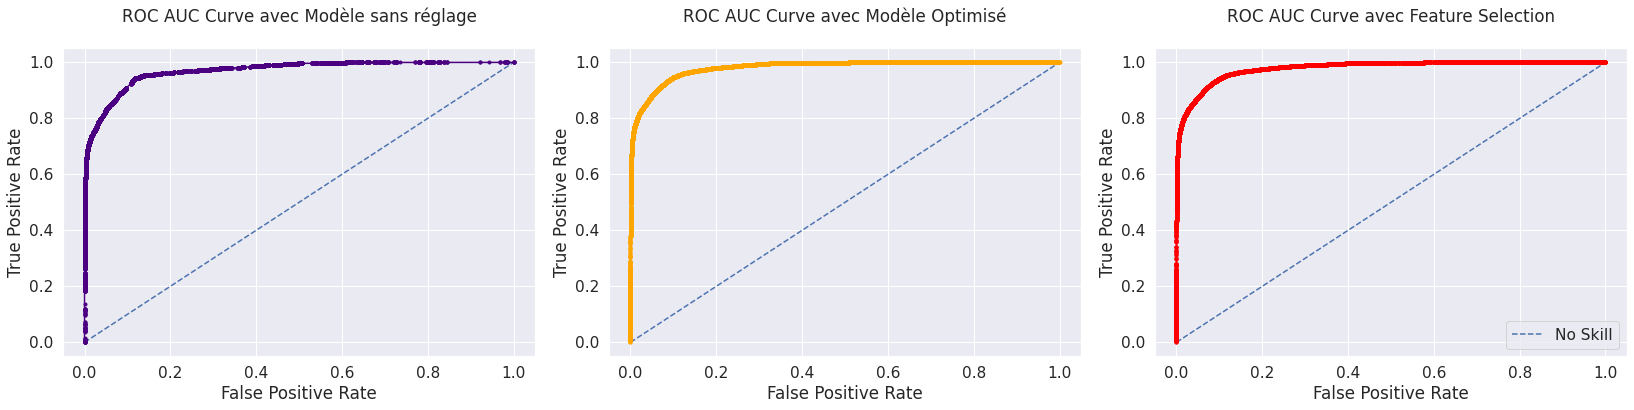

In [ ]:
probability0 = [0 for _ in range(len(y_valid))]
ns_auc = roc_auc_score(y_valid, probability0)

xgbc_auc1 = roc_auc_score(y_valid, probability1)
xgbc_auc2 = roc_auc_score(y_valid, probability2)
xgbc_auc3 = roc_auc_score(y_valid, probability3)

ns_fpr, ns_tpr, _ = roc_curve(y_valid, probability0)
xgbc_fpr1, xgbc_tpr1, _ = roc_curve(y_valid, probability1)
xgbc_fpr2, xgbc_tpr2, _ = roc_curve(y_valid, probability2)
xgbc_fpr3, xgbc_tpr3, _ = roc_curve(y_valid, probability3)

fig, ax = plt.subplots(1, 3, figsize = (23, 6))
ax[0].plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax[0].plot(xgbc_fpr1, xgbc_tpr1, color = 'indigo', marker='.')

ax[1].plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax[1].plot(xgbc_fpr2, xgbc_tpr2, color = 'orange', marker='.')

ax[2].plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax[2].plot(xgbc_fpr3, xgbc_tpr3, color = 'red', marker='.')

ax[0].set(xlabel="False Positive Rate", ylabel="True Positive Rate")
ax[1].set(xlabel="False Positive Rate", ylabel="True Positive Rate")
ax[2].set(xlabel="False Positive Rate", ylabel="True Positive Rate")

ax[0].set_title("ROC AUC Curve avec Modèle sans réglage\n")
ax[1].set_title("ROC AUC Curve avec Modèle Optimisé\n")
ax[2].set_title("ROC AUC Curve avec Feature Selection\n")

plt.legend()

plt.tight_layout()
plt.savefig('/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/Resultats/ROCAUC Comparaison.png')
plt.show()

# Essais de Simulation et TEST

In [10]:
filename_path = '/content/gdrive/My Drive/microsoft_ia/Analyses_Projet_CO/XGBC_BF.joblib'
colonnes_path = '/content/gdrive/My Drive/microsoft_ia/Analyses_Projet_CO/ColonnesXGBC_BF.joblib'
scaler_path = '/content/gdrive/My Drive/microsoft_ia/Analyses_Projet_CO/ScalerXGBC_BF.joblib'

colonnes = joblib.load(colonnes_path)
model = joblib.load(filename_path)
scaler = joblib.load(scaler_path)

In [16]:
Dataset = pd.read_csv('/content/gdrive/My Drive/microsoft_ia/Analyses_Projet_CO/CSV_checkpoint/Dataset_F.csv')

# Suppression des variables temporelles:
Dataset = Dataset.drop(['transaction_date'], 1)
Dataset['membership_expire_date'] = Format_intdate(Dataset['membership_expire_date'])
Dataset['registration_init_time'] = Format_intdate(Dataset['registration_init_time'])

# Afin d'effectuer un futur encodage:
Dataset['city'] = [str(i)+'C' for i in Dataset.city]
Dataset['payment_method_id'] = [str(i)+'P' for i in Dataset.payment_method_id]
Dataset['registered_via'] = [str(i)+'R' for i in Dataset.registered_via]

# Encodage:
Dataset = pd.concat([Dataset, pd.get_dummies(Dataset.gender)],1)
Dataset = pd.concat([Dataset, pd.get_dummies(Dataset.payment_method_id)],1)
Dataset = pd.concat([Dataset, pd.get_dummies(Dataset.registered_via)],1)
Dataset = pd.concat([Dataset, pd.get_dummies(Dataset.city)],1)
Dataset = Dataset.drop(['gender', 'payment_method_id','registered_via', 'city'], 1)

# Vérification:
find_NaN(Dataset)

Dataset.head()

Aucune valeur manquante n'est détectée sur ce dataset


,msno,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,membership_expire_date,is_cancel,transaction_count,bd,registration_init_time,num_25Sum,num_50Sum,num_75Sum,num_985Sum,num_100Sum,num_unqSum,total_secsSum,num_25Mean,num_50Mean,num_75Mean,num_985Mean,num_100Mean,num_unqMean,total_secsMean,count,is_churn,price_per_day,days_fidelity,female,inconnu,male,10P,11P,12P,13P,14P,15P,16P,17P,18P,19P,20P,21P,22P,23P,26P,27P,28P,29P,30P,31P,32P,33P,34P,35P,36P,37P,38P,39P,3P,40P,41P,6P,8P,13R,3R,4R,7R,9R,10C,11C,12C,13C,14C,15C,16C,17C,18C,19C,1C,20C,21C,22C,3C,4C,5C,6C,7C,8C,9C
0,+++IubgjAxvn,30,99,99,1,20170402,0,1,-1,20160503,200.0,47.0,42.0,39.0,747.0,684.0,220954.5830,6.896552,1.620690,1.448276,1.344828,25.758621,23.586207,7619.123552,29,0,3.300000,334,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,+++KGJ1Vi2lH,30,149,149,1,20170406,0,1,27,20111001,212.0,37.0,38.0,34.0,401.0,585.0,116986.9040,7.851852,1.370370,1.407407,1.259259,14.851852,21.666667,4332.848296,27,0,4.966667,2014,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,+++MqaETxAaV,30,99,99,1,20170427,0,1,-1,20151128,41.0,9.0,3.0,9.0,624.0,509.0,140733.2220,1.708333,0.375000,0.125000,0.375000,26.000000,21.208333,5863.884250,24,0,3.300000,516,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,+++l4M/sEnP0,30,149,149,1,20170503,0,2,25,20160928,219.0,39.0,32.0,34.0,2201.0,1792.0,542811.6555,7.300000,1.300000,1.066667,1.133333,73.366667,59.733333,18093.721850,30,0,4.966667,217,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,+++r/zNZrW5d,30,149,149,1,20170402,0,1,25,20070506,192.0,41.0,25.0,27.0,862.0,765.0,231866.1780,6.400000,1.366667,0.833333,0.900000,28.733333,25.500000,7728.872600,30,0,4.966667,3619,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [17]:
# Split
r =  40
Train, REM = train_test_split(Dataset, train_size=0.7, stratify = Dataset['is_churn'], random_state = r)
Valid, Test = train_test_split(REM, test_size=0.2, stratify = REM['is_churn'], random_state = r)
print(f'Dimensions Train : {Train.shape}')
print(f'Dimensions Valid : {Valid.shape}')
print(f'Dimensions Test  : {Test.shape}\n')

# Vérification de la proportion churn:
ratio_churn(Train,'Train')
ratio_churn(Valid,'Valid')
ratio_churn(Test,'Test')

# Définition de features X et Target Y
X_train = Train.drop(['msno','is_churn'], axis = 1)
y_train = Train['is_churn'].astype(int)

X_valid = Valid.drop(['msno','is_churn'], axis = 1)
y_valid = Valid['is_churn'].astype(int)

print("\nDimension X_train dataset: ", X_train.shape)
print("Dimension y_train dataset: ",   y_train.shape)
print("Dimension X_valid dataset: ",   X_valid.shape)
print("Dimension y_valid dataset: ",   y_valid.shape)

# Standardisation des données
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

#scaler = joblib.dump(sc_X, '/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/ScalerXGBC_BF.joblib')

X_valid2 = pd.DataFrame(sc_X.transform(X_valid))
X_valid2.columns = X_valid.columns.values
X_valid2.index = X_valid.index.values
X_valid = X_valid2

Dimensions Train : (508005, 90)
Dimensions Valid : (174173, 90)
Dimensions Test  : (43544, 90)

Proportion désabonnés sur Train :	6.42 %
Proportion désabonnés sur Valid :	6.42 %
Proportion désabonnés sur Test :	6.42 %

Dimension X_train dataset:  (508005, 88)
Dimension y_train dataset:  (508005,)
Dimension X_valid dataset:  (174173, 88)
Dimension y_valid dataset:  (174173,)


In [19]:
model = XGBClassifier(eval_metric = 'logloss', objective = 'binary:logistic', tree_method='hist').fit(X_train, y_train)
y_pred = model.predict(X_valid)
probability = model.predict_proba(X_valid)
probability = probability[:,1]

auc = metrics.roc_auc_score(y_valid, probability)
logloss = metrics.log_loss(y_valid, probability)
f1 = metrics.f1_score(y_valid, y_pred)
precision = metrics.precision_score(y_valid, y_pred)
recall = metrics.recall_score(y_valid, y_pred)
MCC = metrics.matthews_corrcoef(y_valid, y_pred)

In [ ]:
X_test = Test.drop(['msno','is_churn'], axis = 1)
y_test = Test['is_churn'].astype(int)

print("Dimension X_test dataset: ",   X_test.shape)
print("Dimension y_test dataset: ",   y_test.shape)

# Standardisation des données Test avec le scaler fit sur données d'entrainement pour l'intégration Web
X_test2 = pd.DataFrame(scaler.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

Dimension X_test dataset:  (43544, 88)
Dimension y_test dataset:  (43544,)


Dimension X_test dataset après réduction:  (43544, 30)

LogLoss : 0.07102262086671336	 AUC : 0.9795180930266394	 F1 : 0.7968687274187073
Recall : 0.7099427753934192	 Precision : 0.9080512351326624	 MCC : 0.7914293960981902



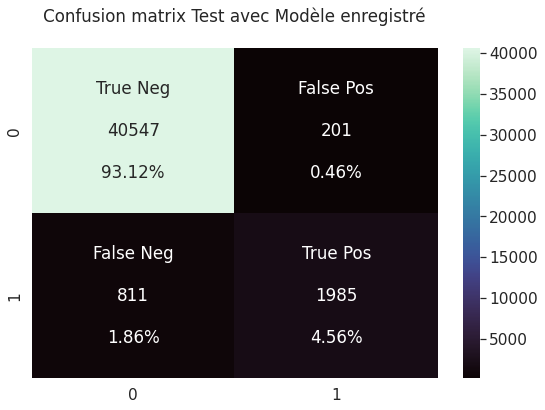

In [ ]:
X_test = X_test[colonnes]
print("Dimension X_test dataset après réduction: ",   X_test.shape)

y_pred = model.predict(X_test)
probability = model.predict_proba(X_test)
probability = probability[:,1]

auc = metrics.roc_auc_score(y_test, probability)
logloss = metrics.log_loss(y_test, probability)
f1 = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
MCC = metrics.matthews_corrcoef(y_test, y_pred)
print(f'\nLogLoss : {logloss}\t AUC : {auc}\t F1 : {f1}\nRecall : {recall}\t Precision : {precision}\t MCC : {MCC}\n')

plt.figure(figsize=(8,6))
df_cm = confusion_matrix(y_test, y_pred) 
group_names = ["True Neg\n", "False Pos\n", "False Neg\n", "True Pos\n"]
group_counts = ["{0:0.0f}\n".format(value) for value in df_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in df_cm.flatten()/np.sum(df_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=labels, fmt="", cmap='mako').set_title('Confusion matrix Test avec Modèle enregistré\n')
class_names=[0,1]
tick_marks = np.arange(len(class_names))

plt.tight_layout()
plt.show()

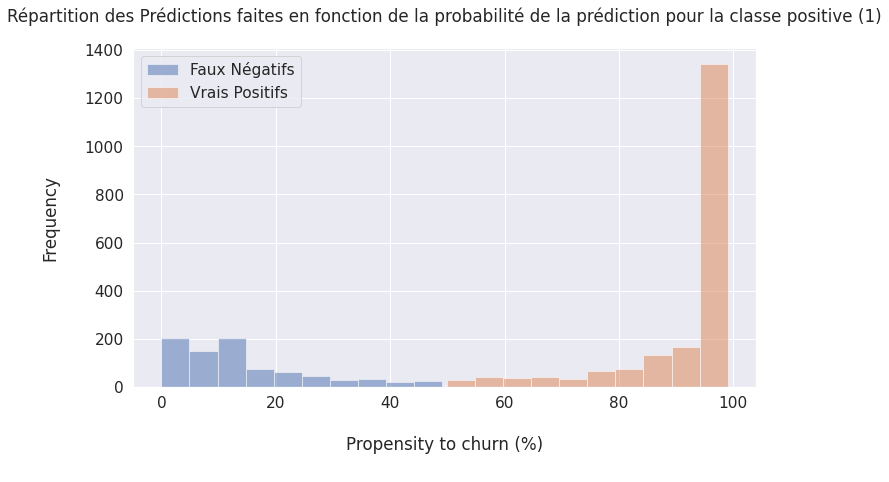

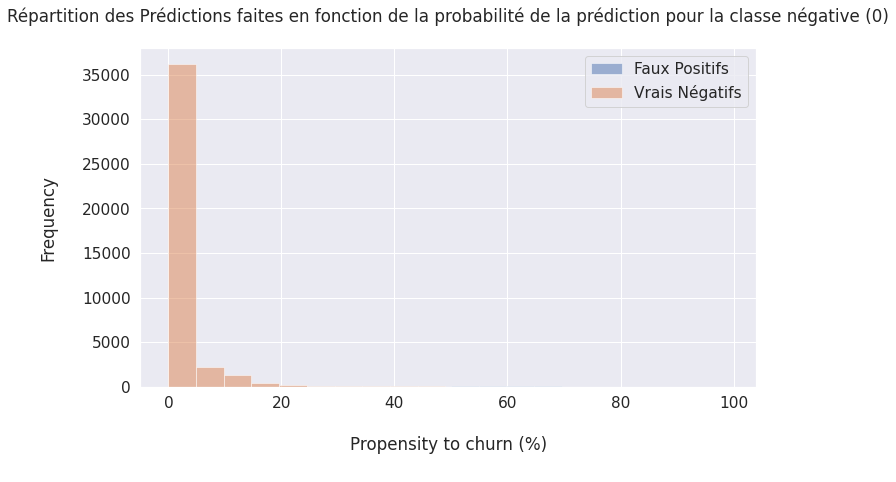

In [ ]:
# Faux Négatifs:
False_Neg = final_results.loc[final_results['is_churn'] == 1]
False_Neg = False_Neg.loc[final_results['predictions'] == 0]

# Vrai Positifs:
True_Pos = final_results.loc[final_results['is_churn'] == 1]
True_Pos = True_Pos.loc[final_results['predictions'] == 1]

# Faux Positifs:
False_Pos = final_results.loc[final_results['is_churn'] == 0]
False_Pos = False_Pos.loc[final_results['predictions'] == 1]

# Vrai Négatifs:
True_Neg = final_results.loc[final_results['is_churn'] == 0]
True_Neg = True_Neg.loc[final_results['predictions'] == 0]

plt.figure(figsize=(12, 7))
False_Neg['propensity_to_churn(%)'].plot.hist(alpha=0.5, label='Faux Négatifs')
True_Pos['propensity_to_churn(%)'].plot.hist(alpha=0.5, label='Vrais Positifs')
plt.xlabel('\nPropensity to churn (%)\n')
plt.ylabel('Frequency\n')
plt.title('Répartition des Prédictions faites en fonction de la probabilité de la prédiction pour la classe positive (1)\n')

plt.tight_layout()
plt.savefig('/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/Resultats/Histogram_VPFN.png')

plt.legend()
plt.show()

plt.figure(figsize=(12, 7))
False_Pos['propensity_to_churn(%)'].plot.hist(alpha=0.5, label='Faux Positifs')
True_Neg['propensity_to_churn(%)'].plot.hist(alpha=0.5, label='Vrais Négatifs')
plt.xlabel('\nPropensity to churn (%)\n')
plt.ylabel('Frequency\n')
plt.title('Répartition des Prédictions faites en fonction de la probabilité de la prédiction pour la classe négative (0)\n')

plt.tight_layout()
plt.savefig('/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/Resultats/Histogram_FPVN.png')

plt.legend()
plt.show()

# Mis en forme des Résultats

In [ ]:
User = Test.sample(n=1)
X_user = User.drop(['is_churn'], axis = 1)
y_user = User['is_churn'].astype(int)

user_identity = X_user['msno']
X_user = X_user.drop(columns = ['msno'])

print("Dimension X_User dataset: ",   X_user.shape)
print("Dimension y_User dataset: ",   y_user.shape)

# Standardisation des données Test avec le scaler fit sur données d'entrainement pour l'intégration Web
X_user2 = pd.DataFrame(scaler.transform(X_user))
X_user2.columns = X_user.columns.values
X_user2.index = X_user.index.values
X_user = X_user2

X_user = X_user[colonnes]
print("Dimension X_User après réduction: ",   X_user.shape)

y_pred = model.predict(X_user)
probability = model.predict_proba(X_user)
probability = probability[:,1]
probability = probability[0]

if y_pred == 1:
    y_pred = 'Client désabonné'
else:
    y_pred = 'Client toujours abonné'

if probability > 0.5:
    probability_not = probability
else:
    probability_not = 1 - probability

print(f'\n{y_pred} avec {round(probability_not*100, 2)} % de probabilité\n')
final_results = User
final_results['predictions'] = y_pred
final_results["propensity_to_churn(%)"] = probability
final_results['is_churn'] = y_user
final_results["propensity_to_churn(%)"] = final_results["propensity_to_churn(%)"]*100
final_results["propensity_to_churn(%)"] = final_results["propensity_to_churn(%)"].round(2)
final_results = final_results.sort_values(by=['propensity_to_churn(%)'], ascending = False)
    
#final_results.set_index(['id_membre'], inplace=False)
final_results.index.id_membre=None
final_results = final_results[['msno', 'is_churn', 'predictions', 'propensity_to_churn(%)']]
final_results

Dimension X_User dataset:  (1, 88)
Dimension y_User dataset:  (1,)
Dimension X_User après réduction:  (1, 30)

Client toujours abonné avec 99.98 % de probabilité



,msno,is_churn,predictions,propensity_to_churn(%)
600663,p/YWTVEighhV,0,Client toujours abonné,0.02


In [ ]:
y_pred = model.predict(X_test)
probability = model.predict_proba(X_test)
probability = probability[:,1]
probability = probability

final_results = Test
final_results['predictions'] = y_pred
final_results["propensity_to_churn(%)"] = probability
final_results['is_churn'] = y_test
final_results["propensity_to_churn(%)"] = final_results["propensity_to_churn(%)"]*100
final_results["propensity_to_churn(%)"] = final_results["propensity_to_churn(%)"].astype(int)
final_results = final_results.sort_values(by=['propensity_to_churn(%)'], ascending = False)
    
final_results.index.id_membre=None
final_results = final_results[['msno', 'is_churn', 'predictions', 'propensity_to_churn(%)']]
final_results

,msno,is_churn,predictions,propensity_to_churn(%)
113500,824Ae2TAQsN3,1,1,99
146424,Awuw7zyuHJPy,1,1,99
151946,BPZv4JmIQZoK,1,1,99
311249,PQw4j5C3oDDI,1,1,99
157347,Btz4StndXewK,1,1,99
...,...,...,...,...
101032,6wXOm0qsiKb5,0,0,0
232403,IU07+OIISgps,0,0,0
450330,bjwPPspJRU1o,0,0,0
605149,pP8d9nhmpfp4,0,0,0


In [ ]:
Table = pd.DataFrame(columns = final_results.columns)
for i in range (10, 110, 10):
    j = i - 10
    Filter = final_results.loc[final_results['propensity_to_churn(%)'] < i]
    Sample = Filter.loc[Filter['propensity_to_churn(%)'] > j].sample(n = 3)
    Table = Table.append(Sample)

In [ ]:
Table.to_csv('/content/gdrive/My Drive/microsoft_ia/Analyses Projet CO/Resultats/Table.csv', index = False)

In [ ]:
Table = pd.read_csv('Resultats/Table.csv')
Table = Table.drop(['is_churn'], 1)
Table = Table.sort_values(by = ['propensity_to_churn(%)'], ascending = [False])
Table.style.background_gradient(cmap="Reds", subset=['propensity_to_churn(%)'])

,msno,predictions,propensity_to_churn(%)
29,6+vSd6lt+qoQ,1,99
28,nRUHevWLX1Fm,1,99
27,j5bRUb+d2CRL,1,99
24,FhWqL2c6GMEh,1,89
26,GiR7l2ZJIe6O,1,88
25,EIXJCdAewLXj,1,84
21,aj1c4ZPwWEQN,1,77
23,CDQqyal5xav4,1,76
22,WHLdPl0ZMqy1,1,72
20,8I/jKIWru5oS,1,63
